In [1]:
import axelrod as axl
import matplotlib
import tqdm

In [ ]:
fp = axl.AshlockFingerprint(axl.TitForTat, axl.TitForTat)
fp.fingerprint(turns=200, repetitions=100)
pl = fp.plot()
pl.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Numerical/TitForTat.png', bbox_inches='tight')

fp = axl.AshlockFingerprint(axl.Psycho, axl.TitForTat)
fp.fingerprint(turns=200, repetitions=100)
pl = fp.plot()
pl.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Numerical/Psycho.png', bbox_inches='tight')

fp = axl.AshlockFingerprint(axl.Defector, axl.TitForTat)
fp.fingerprint(turns=200, repetitions=100)
pl = fp.plot()
pl.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Numerical/Defector.png', bbox_inches='tight')

fp = axl.AshlockFingerprint(axl.Cooperator, axl.TitForTat)
fp.fingerprint(turns=200, repetitions=100)
pl = fp.plot()
pl.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Numerical/Cooperator.png', bbox_inches='tight')



Playing matches:  43%|████▎     | 4345/10201 [01:24<02:16, 42.78it/s]

In [1]:
# Sum of squares plot...
import string
import numpy as np
import axelrod as axl
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# import seaborn as sns

In [16]:
def format_filename(s):
    """
    Take a string and return a valid filename constructed from the string.
    Uses a whitelist approach: any characters not present in valid_chars are
    removed. Also spaces are replaced with underscores.
    Note: this method may produce invalid filenames such as ``, `.` or `..`
    When I use this method I prepend a date string like '2009_01_15_19_46_32_'
    and append a file extension like '.txt', so I avoid the potential of using
    an invalid filename.
    Borrowed from https://gist.github.com/seanh/93666
    """
    valid_chars = "-_.() {}{}".format(string.ascii_letters, string.digits)
    filename = ''.join(c for c in s if c in valid_chars)
    filename = filename.replace(' ','_')
    return filename

In [25]:
strats = axl.strategies

strategies = [s.name for s in strats]
path = '/Users/James/Projects/Axelrod-fingerprint/assets/'
filenames = [path + format_filename(s) + '.csv' for s in strategies]
dataframes = [pd.read_csv(f) for f in filenames]


def score_for_df(A, B):
    """
    Compute the sum of squares score for two dataframes, A and B
    """
    result = pd.merge(A, B, on=['x', 'y'], suffixes=('_A', '_B'))
    result['SQ_difference'] = (result['score_A'] - result['score_B'])**2
    result.drop(['score_A', 'score_B'], axis=1, inplace=True)
    return sum(result.SQ_difference)


sum_squares_df = pd.DataFrame(index=strategies, columns=strategies)

for indexA, strategyA in enumerate(tqdm(strategies)):
    A_df = dataframes[indexA]
    for indexB, strategyB in enumerate(strategies):
        B_df = dataframes[indexB]
        similarity_score = score_for_df(A_df, B_df)
        sum_squares_df.set_value(strategyA, strategyB, similarity_score)

sum_squares_df

100%|██████████| 181/181 [07:37<00:00,  2.56s/it]


,Adaptive,Adaptive Tit For Tat,Aggravater,ALLCorALLD,Alternator,Alternator Hunter,AntiCycler,Anti Tit For Tat,Adaptive Pavlov 2006,Adaptive Pavlov 2011,...,Meta Winner Finite Memory,Meta Winner Long Memory,Meta Winner Stochastic,NMWE Deterministic,NMWE Finite Memory,NMWE Long Memory,NMWE Memory One,NMWE Stochastic,Nice Meta Winner,Nice Meta Winner Ensemble
Adaptive,0,13365.2,2354.8,14380.9,12773.6,39455.1,33897.4,13565.6,11872.9,8651.69,...,2176.67,2177.05,2131.55,1944.34,1795.96,1960.83,1823.4,1815.51,1990.27,1922.17
Adaptive Tit For Tat,13365.2,0,14804.2,1280.63,1441.76,9991.9,7011.08,8313.64,1224.03,1853.75,...,14677.4,14690.4,14438.9,13941.6,12617.2,13971.9,12246.2,13600.8,14034.1,13910.5
Aggravater,2354.8,14804.2,0,16100,14660.6,43575.7,37694.6,15001.7,12482.9,9192.25,...,190.426,190.957,188.378,259.191,374.156,257.048,398.091,300.557,251.895,264.295
ALLCorALLD,14380.9,1280.63,16100,0,493.319,7443.7,4794.99,4695.7,3206.06,4282.04,...,15790.6,15802.9,15583.9,15305.4,13864,15332.5,13384.9,15020.2,15394.8,15280
Alternator,12773.6,1441.76,14660.6,493.319,0,8782.08,5890.75,4220.08,3122.2,4148.77,...,14347.4,14360.6,14151.5,13858.1,12493.8,13889.1,12045.1,13570.4,13954.1,13827.4
Alternator Hunter,39455.1,9991.9,43575.7,7443.7,8782.08,0,1083.53,15266.5,14641.5,18555.2,...,43193.1,43214,42856.4,42261,39819.8,42305.8,39022.5,41759.8,42412.5,42215.7
AntiCycler,33897.4,7011.08,37694.6,4794.99,5890.75,1083.53,0,12270,11204.7,14644.4,...,37326.5,37345.9,37006.3,36465.6,34188.6,36509.9,33442.3,35995.8,36608.8,36422.5
Anti Tit For Tat,13565.6,8313.64,15001.7,4695.7,4220.08,15266.5,12270,0,10499.9,11489.3,...,14527,14538.9,14427.5,14325.1,12962,14347.4,12471,14158.1,14398.8,14309.5
Adaptive Pavlov 2006,11872.9,1224.03,12482.9,3206.06,3122.2,14641.5,11204.7,10499.9,0,1627.15,...,12411.8,12421.3,12197.5,11743.3,10713,11769.6,10408.3,11464,11815.8,11718.1
Adaptive Pavlov 2011,8651.69,1853.75,9192.25,4282.04,4148.77,18555.2,14644.4,11489.3,1627.15,0,...,9165.94,9174.83,8959.46,8488.8,7644.94,8511.11,7447.42,8198.02,8556.95,8461.87


In [60]:
# sum_squares_df[sum_squares_df.isnull().any(axis=1)]
sum_squares_df = sum_squares_df.apply(pd.to_numeric)
size = len(dataframes[0].index)
mean_squares_df = sum_squares_df.divide(size)
mean_squares_df.head()

,Adaptive,Adaptive Tit For Tat,Aggravater,ALLCorALLD,Alternator,Alternator Hunter,AntiCycler,Anti Tit For Tat,Adaptive Pavlov 2006,Adaptive Pavlov 2011,...,Meta Winner Finite Memory,Meta Winner Long Memory,Meta Winner Stochastic,NMWE Deterministic,NMWE Finite Memory,NMWE Long Memory,NMWE Memory One,NMWE Stochastic,Nice Meta Winner,Nice Meta Winner Ensemble
Adaptive,0.000000,1.310185,0.230840,1.409751,1.252190,3.867773,3.322945,1.329827,1.163894,0.848122,...,0.213378,0.213415,0.208955,0.190603,0.176057,0.192219,0.178748,0.177973,0.195105,0.188430
Adaptive Tit For Tat,1.310185,0.000000,1.451247,0.125540,0.141335,0.979502,0.687294,0.814983,0.119991,0.181723,...,1.438821,1.440095,1.415438,1.366692,1.236857,1.369662,1.200492,1.333277,1.375755,1.363645
Aggravater,0.230840,1.451247,0.000000,1.578276,1.437175,4.271711,3.695183,1.470613,1.223693,0.901113,...,0.018667,0.018719,0.018467,0.025408,0.036678,0.025198,0.039025,0.029464,0.024693,0.025909
ALLCorALLD,1.409751,0.125540,1.578276,0.000000,0.048360,0.729703,0.470051,0.460318,0.314289,0.419767,...,1.547947,1.549151,1.527684,1.500382,1.359083,1.503037,1.312121,1.472422,1.509151,1.497893
Alternator,1.252190,0.141335,1.437175,0.048360,0.000000,0.860904,0.577468,0.413692,0.306068,0.406702,...,1.406473,1.407764,1.387262,1.358504,1.224763,1.361544,1.180780,1.330305,1.367914,1.355490


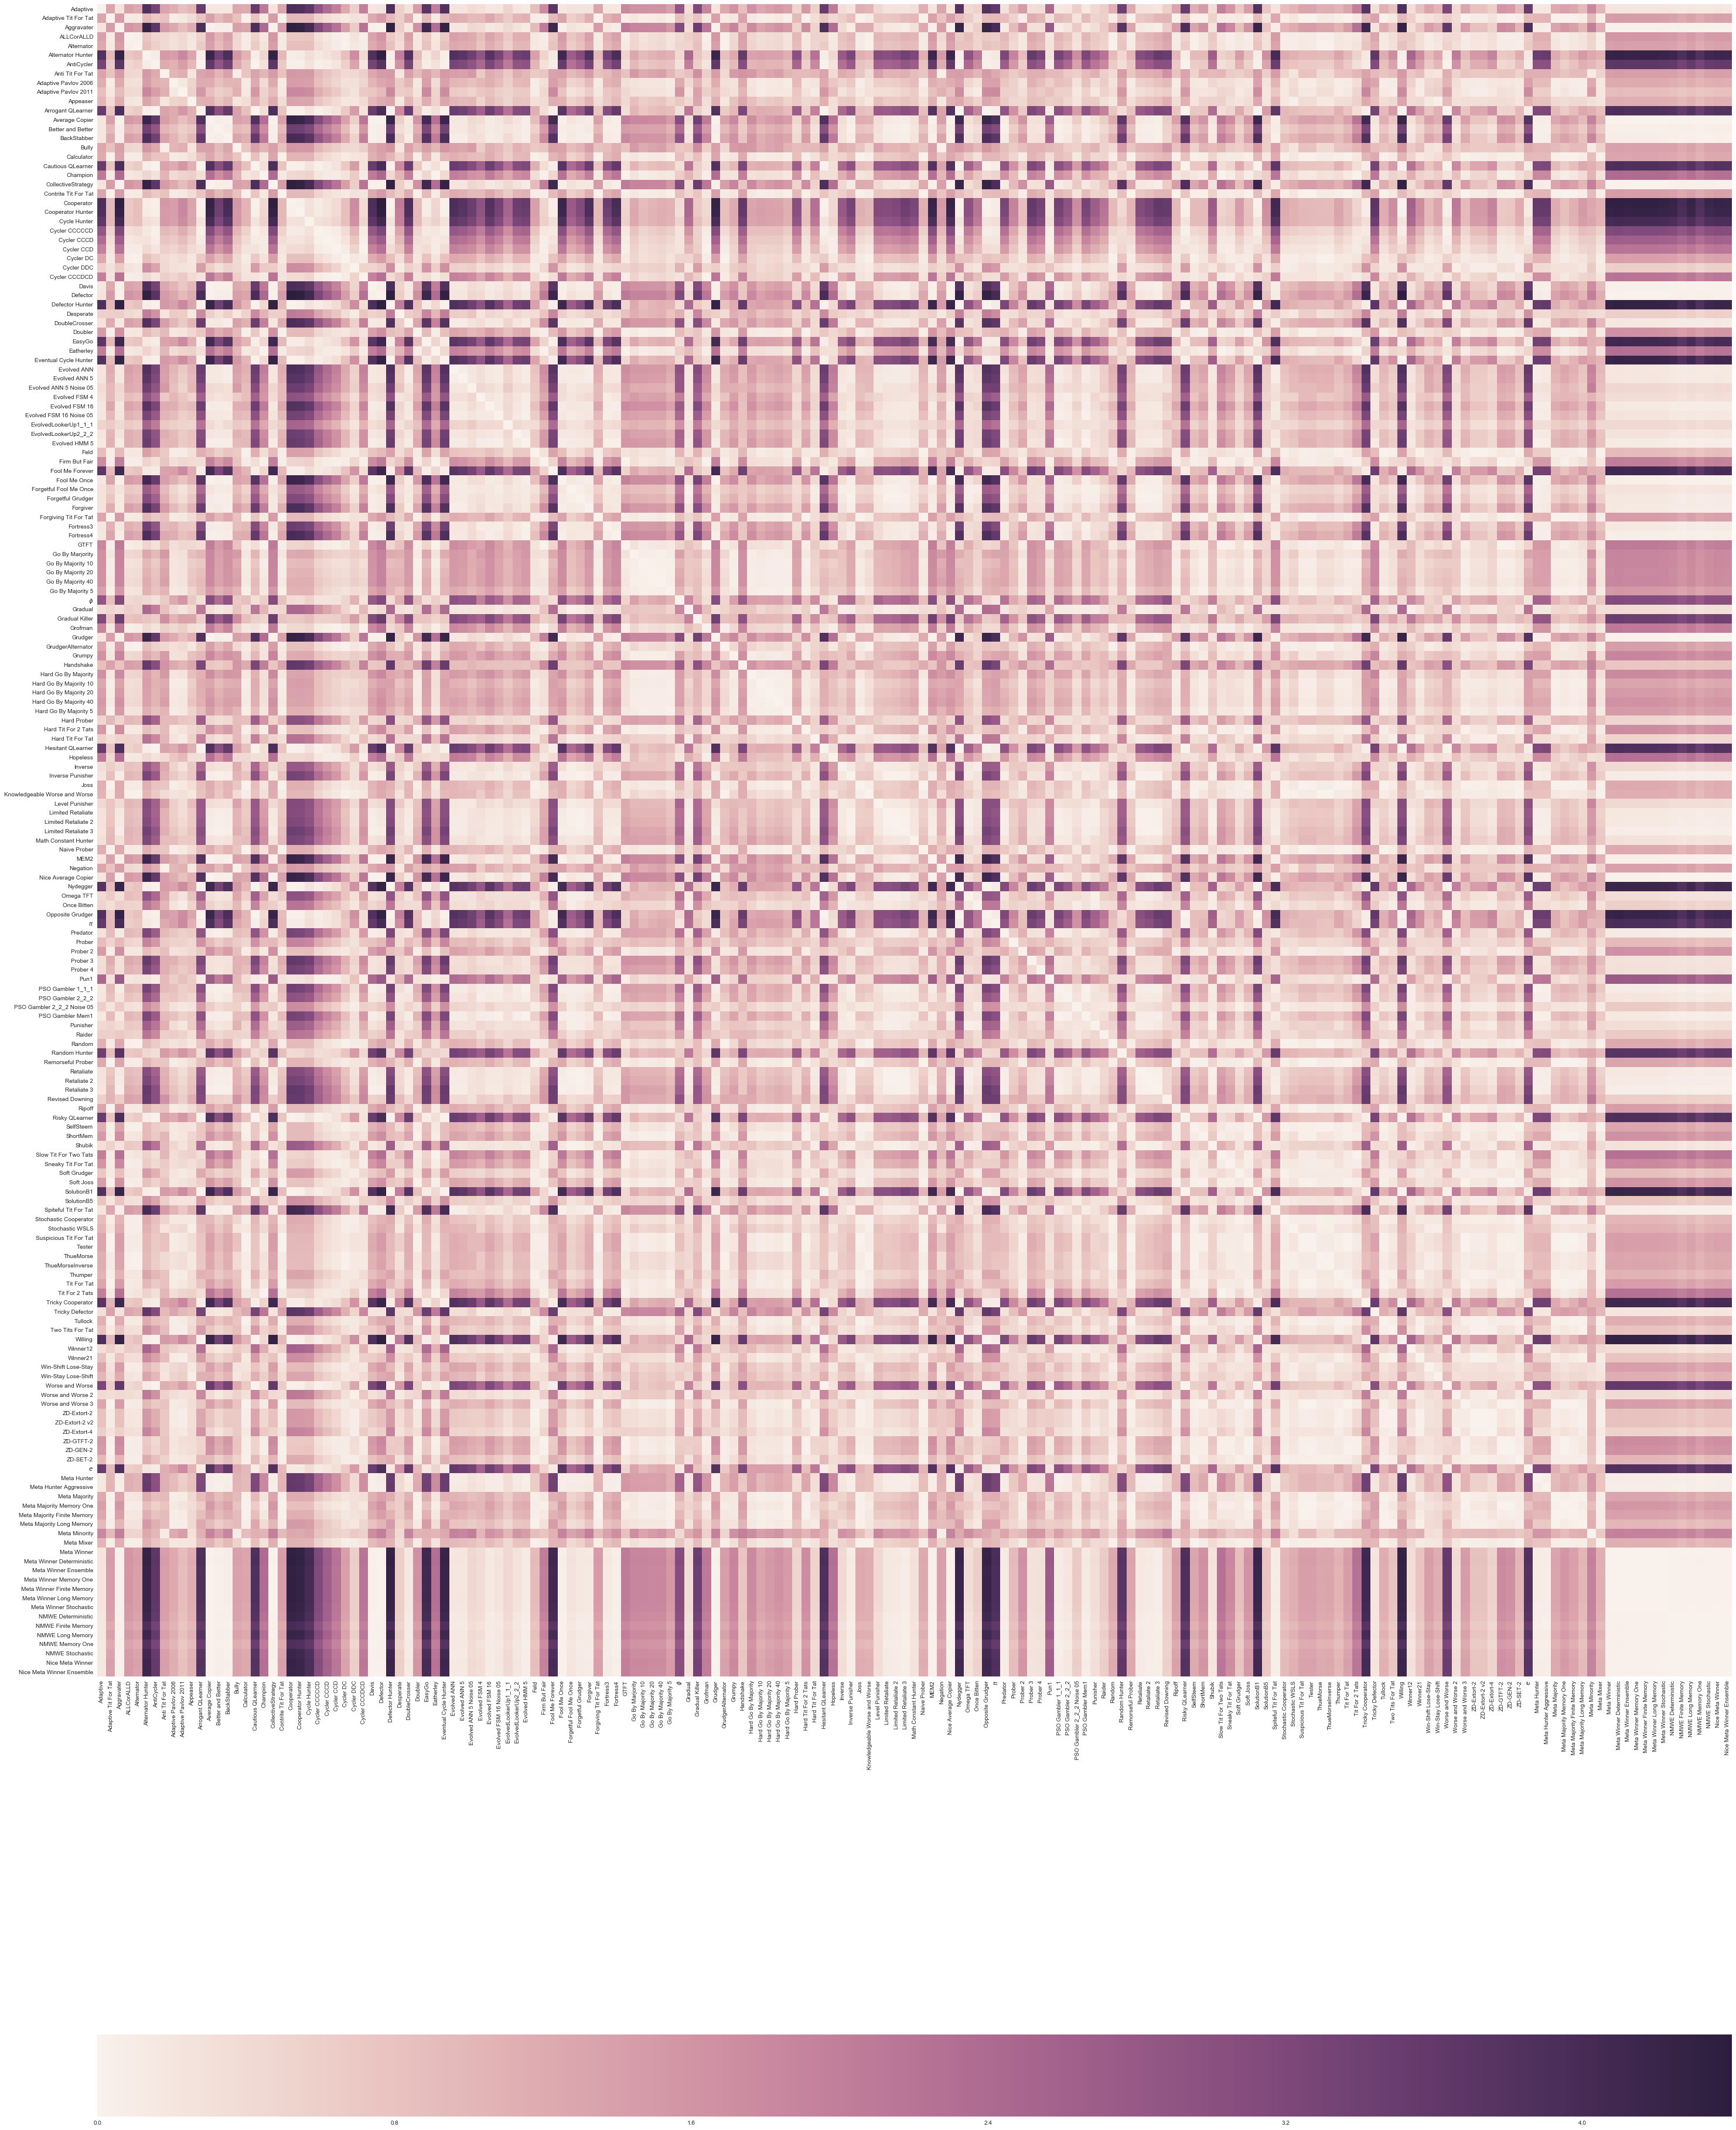

In [79]:
plt.figure(figsize=(50, 75))
sns.heatmap(mean_squares_df, cbar_kws={"orientation": "horizontal"})
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
# cbar.set_ticks([0, .2, .75, 1])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
# fig.colorbar(ax, orientation="horizontal",fraction=0.07,anchor=(1.0,0.0))
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/mean_squares.png', bbox_inches="tight")
plt.show()

# f, ax = plt.subplots(figsize=(50, 50))
# sns.heatmap(sum_squares_df, cbar=False)

In [3]:
import axelrod as axl

axl.seed(0)  # Set a seed
players = [axl.TitForTat(), axl.Cooperator(), axl.Random(), axl.Gradual()]  # Create players
tournament = axl.Tournament(players)  # Create a tournament
results = tournament.play()  # Play the tournament
plot = axl.Plot(results)
p = plot.boxplot()
q = plot.payoff()

Finishing: 100%|██████████| 21/21 [00:00<00:00, 4374.06it/s]
/Users/James/anaconda3/envs/fingerprint/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


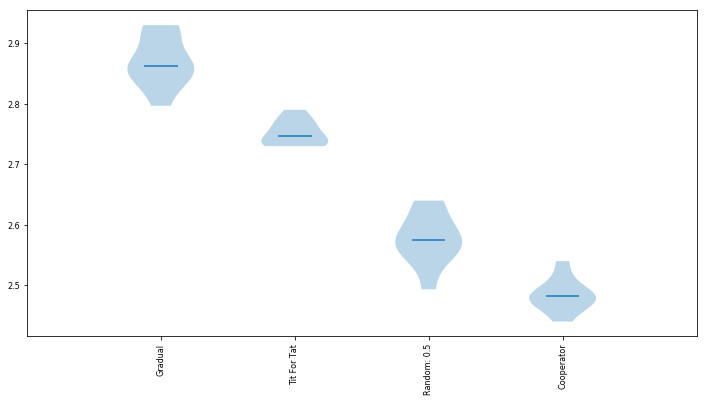

In [7]:
p.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/examples/small_violin.png')
p

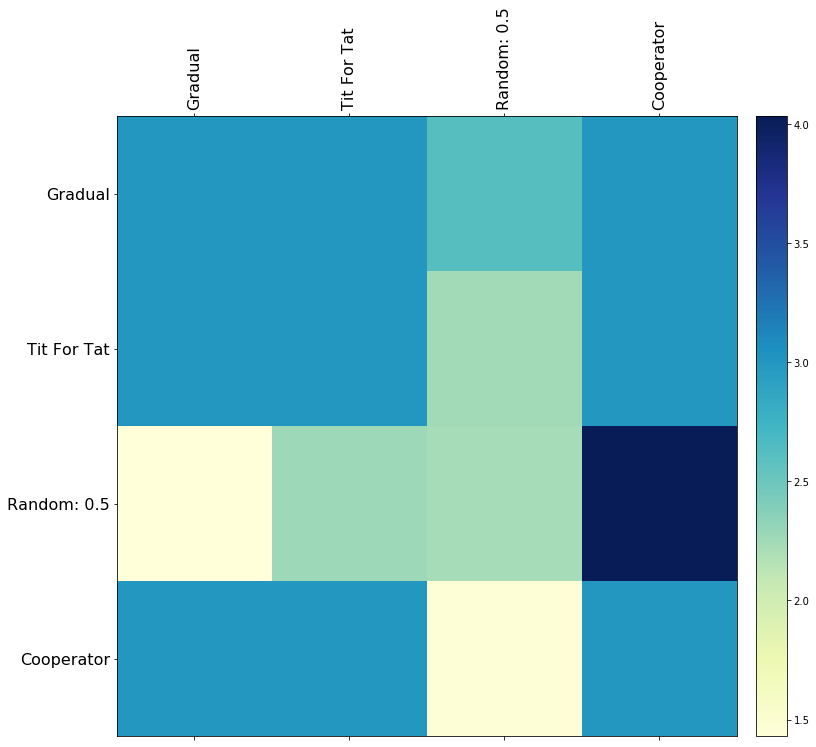

In [8]:
q.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/examples/small_payoff.png')
q

# Analytical Plots

In [2]:
def TFT(coord):
    x, y = coord
    numerator = y**2 + 5*x*y + 3*x**2
    denominator = (x + y)**2
    return numerator/denominator

def WSLS(coord):
    x, y = coord
    numerator = (3*x + y)*(x - 1) + 5*y*(y - 1)
    denominator = (x + 2*y)*(x - 1) + y*(y - 1)
    return numerator/denominator

def Psycho(coord):
    x, y = coord
    numerator = 4*(y - 1)*(x - 1) + 5*(y - 1)**2
    denominator = 2*(y - 1)*(x - 1) + (x - 1)**2 + (y - 1)**2
    return numerator/denominator

def Coop(coord):
    x, y = coord
    return 3 - 3*y

def Defect(coord):
    x, y = coord
    return 4*x + 1

In [3]:
from collections import namedtuple

Point = namedtuple('Point', 'x y')

def reshape_data(data, points, size):
    """Shape the data so that it can be plotted easily.
    Parameters
    ----------
    data : dictionary
        A dictionary where the keys are Points of the form (x, y) and
        the values are the mean score for the corresponding interactions.
    points : list
        of Point objects with coordinates (x, y).
    size : int
        The number of Points in every row/column.
    Returns
    ----------
    plotting_data : list
        2-D numpy array of the scores, correctly shaped to ensure that the
        score corresponding to Point (0, 0) is in the left hand corner ie.
        the standard origin.
    """
    ordered_data = [data[point] for point in points]
    shaped_data = np.reshape(ordered_data, (size, size), order='F')
    plotting_data = np.flipud(shaped_data)
    return plotting_data
    

def create_points(step, progress_bar=False):
    """Creates a set of Points over the unit square.
    A Point has coordinates (x, y). This function constructs points that are
    separated by a step equal to `step`. The points are over the unit
    square which implies that the number created will be (1/`step` + 1)^2.
    Parameters
    ----------
    step : float
        The separation between each Point. Smaller steps will produce more
        Points with coordinates that will be closer together.
    progress_bar : bool
        Whether or not to create a progress bar which will be updated
    Returns
    ----------
    points : list
        of Point objects with coordinates (x, y)
    """
    num = int((1 / step) // 1) + 1

    if progress_bar:
        p_bar = tqdm(total=num ** 2, desc="Generating points")

    points = []
    for x in np.linspace(0, 1, num):
        for y in np.linspace(0, 1, num):
            points.append(Point(x, y))

            if progress_bar:
                p_bar.update()

    if progress_bar:
        p_bar.close()

    return points


def plot(plotting_data, col_map='seismic', interpolation='none', title=None,
         colorbar=True, labels=True):
    """Plot the results of the spatial tournament.
    Parameters
    ----------
    col_map : str, optional
        A matplotlib colour map, full list can be found at
        http://matplotlib.org/examples/color/colormaps_reference.html
    interpolation : str, optional
        A matplotlib interpolation, full list can be found at
        http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
    title : str, optional
        A title for the plot
    colorbar : bool, optional
        Choose whether the colorbar should be included or not
    labels : bool, optional
        Choose whether the axis labels and ticks should be included
    Returns
    ----------
    figure : matplotlib figure
        A heat plot of the results of the spatial tournament
    """
    fig, ax = plt.subplots()
    cax = ax.imshow(
        plotting_data, cmap=col_map, interpolation=interpolation)

    if colorbar:
        max_score = np.nanmax(plotting_data)
        min_score = np.nanmin(plotting_data)
        ticks = [min_score, (max_score + min_score) / 2, max_score]
        fig.colorbar(cax, ticks=ticks)

    plt.xlabel('$x$')
    plt.ylabel('$y$', rotation=0)
    ax.tick_params(axis='both', which='both', length=0)
    plt.xticks([0, len(plotting_data) - 1], ['0', '1'])
    plt.yticks([0, len(plotting_data) - 1], ['1', '0'])

    if not labels:
        plt.axis('off')

    if title is not None:
        plt.title(title)
    return fig

In [4]:
step=0.01
size = int((1 / step) // 1) + 1
points = create_points(step)

In [5]:
TFT_Data = {p: TFT(p) for p in points}
WSLS_Data = {p: WSLS(p) for p in points}
Psycho_Data = {p: Psycho(p) for p in points}
Coop_Data = {p: Coop(p) for p in points}
Defect_Data = {p: Defect(p) for p in points}

/Users/James/anaconda3/envs/fingerprint/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars
/Users/James/anaconda3/envs/fingerprint/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
/Users/James/anaconda3/envs/fingerprint/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [6]:
TFT_Data = reshape_data(TFT_Data, points, size)
WSLS_Data = reshape_data(WSLS_Data, points, size)
Psycho_Data = reshape_data(Psycho_Data, points, size)
Coop_Data = reshape_data(Coop_Data, points, size)
Defect_Data = reshape_data(Defect_Data, points, size)

In [7]:
np.nanmax(TFT_Data)

3.0000000000000004

In [9]:
TFT_plot = plot(TFT_Data)
WSLS_plot = plot(WSLS_Data)
Psycho_plot = plot(Psycho_Data)
Coop_plot = plot(Coop_Data)
Defect_plot = plot(Defect_Data)

In [11]:
TFT_plot.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Analytical/TitForTat-Analytical.png', bbox_inches='tight')
WSLS_plot.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Analytical/WSLS-Analytical.png', bbox_inches='tight')
Psycho_plot.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Analytical/Psycho-Analytical.png', bbox_inches='tight')
Coop_plot.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Analytical/Coop-Analytical.png', bbox_inches='tight')
Defect_plot.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/Analytical/Defect-Analytical.png', bbox_inches='tight')